# 6.4 Machine Learning Part 1

## This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Defining path
path=r'/Users/frankamoboateng/Downloads/19.08.23 World University Rankings'

In [4]:
#importing data
df_uni = pd.read_csv(os.path.join(path,'02. DATA','PREPARED DATA','uni_ranks.csv'), index_col = False)

## 2. Data cleaning

In [11]:
df_uni.head(20)

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
1,201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
2,202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
3,203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
4,204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
5,205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
6,206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
7,207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
8,208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
9,209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [10]:
df_uni.columns

Index(['Unnamed: 0', 'world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [12]:
df_uni.shape

(2000, 15)

In [13]:
# Create a subset excluding the "Unnamed:0", "Country" "year"

sub = df_uni[['world_rank', 'national_rank', 'quality_of_education','alumni_employment', 
              'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score']]

## Missing values

In [16]:
# Check for missing values

sub.isnull().sum()

# No missing values to handle

world_rank              0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
dtype: int64

## Duplicates check

In [17]:
dups = sub.duplicated()

In [19]:
dups.shape # No dups

(2000,)

## Extreme values checks

<Axes: xlabel='world_rank', ylabel='Count'>

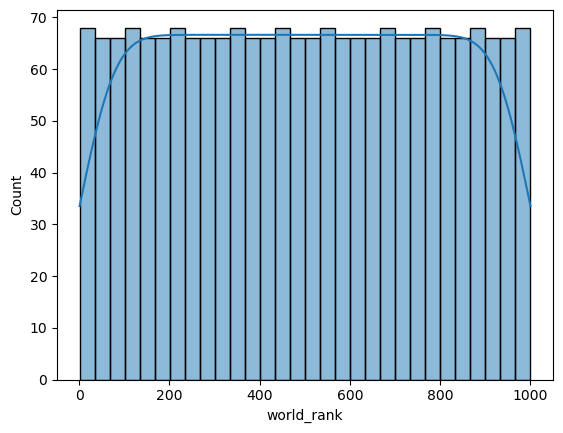

In [27]:
sns.histplot(sub['world_rank'], bins = 30, kde = True) ## no extreme values indicated 

In [28]:
sub['world_rank'].mean() # Check the mean

500.5

In [29]:
sub['world_rank'].median() # Check the median

500.5

In [31]:
df['world_rank'].max() # Check the max

1000

## 3. Data prep for regression analysis

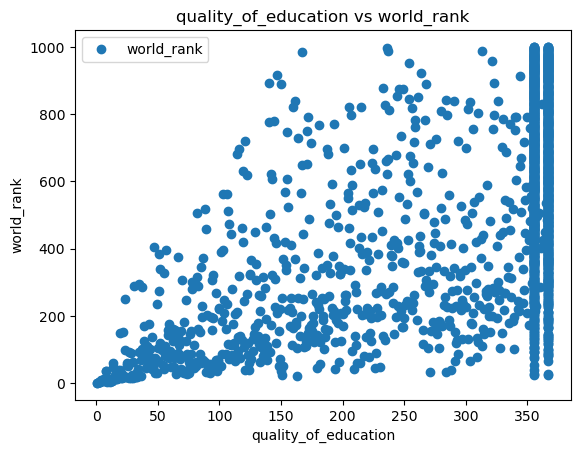

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'quality_of_education', y='world_rank',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('quality_of_education vs world_rank')  
plt.xlabel('quality_of_education')  
plt.ylabel('world_rank')  
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['quality_of_education'].values.reshape(-1,1)
y = df['world_rank'].values.reshape(-1,1)

In [37]:
X

array([[  1],
       [ 11],
       [  3],
       ...,
       [367],
       [367],
       [367]])

In [39]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]])

In [40]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [41]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

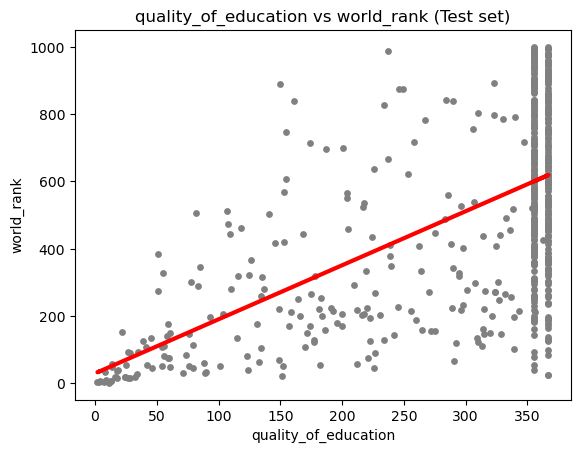

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('quality_of_education vs world_rank (Test set)')
plot_test.xlabel('quality_of_education')
plot_test.ylabel('world_rank')
plot_test.show()

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.60478601]]
Mean squared error:  56623.36637673271
R2 score:  0.3212888470983414


In [47]:
y_predicted

array([[599.73978766],
       [618.99721976],
       [618.99721976],
       [599.73978766],
       [521.10527327],
       [344.57881238],
       [618.99721976],
       [618.99721976],
       [618.99721976],
       [ 68.55561899],
       [562.82970948],
       [618.99721976],
       [599.73978766],
       [599.73978766],
       [599.73978766],
       [618.99721976],
       [599.73978766],
       [618.99721976],
       [618.99721976],
       [379.88410456],
       [618.99721976],
       [618.99721976],
       [599.73978766],
       [618.99721976],
       [ 86.20826508],
       [618.99721976],
       [599.73978766],
       [127.93270129],
       [599.73978766],
       [618.99721976],
       [618.99721976],
       [245.08207988],
       [618.99721976],
       [618.99721976],
       [ 52.50775891],
       [599.73978766],
       [618.99721976],
       [471.35690702],
       [599.73978766],
       [599.73978766],
       [ 84.60347907],
       [503.45262718],
       [618.99721976],
       [ 55

In [48]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,406,599.739788
1,191,618.997220
2,133,618.997220
3,732,599.739788
4,755,521.105273
5,179,344.578812
6,534,618.997220
7,304,618.997220
8,858,618.997220
9,19,68.555619


### from the R2 value we can infer a rather slightly weak relationship between the relationship between the  predicted dataset. 

## Compare how the regression fits the training set

In [49]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [50]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.60478601]]
Mean squared error:  53704.39918724484
R2 score:  0.3549490513650002


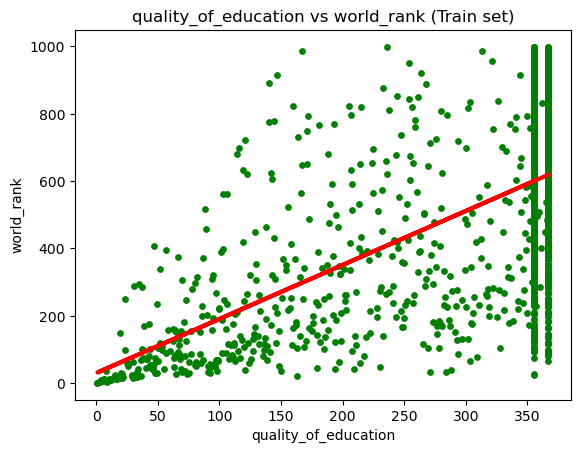

In [52]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('quality_of_education vs world_rank (Train set)')
plot_test.xlabel('quality_of_education')
plot_test.ylabel('world_rank')
plot_test.show()

### it can be concluded that the regression fits the training results as visually we can see a strong relationship between the quality of education and the world rank